In [2]:
import sys
import warnings

import torch

sys.path.append('../')
from datasets.dist import GMM, Gaussian
from model.flow import FlowWrapper
from utils.parsing import parse_args
from datasets.verlet import VerletData

# Suppress specific UserWarnings globally
warnings.filterwarnings("ignore", category=UserWarning)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# Initialize default Verlet Flow
flow_wrapper = FlowWrapper.load_saved('../workdir/explode_test5/best_model.pt')
flow_wrapper.eval()

INFO:root:Starting training run with the following arguments:
INFO:root:config: None
INFO:root:log_dir: workdir
INFO:root:restart_dir: None
INFO:root:wandb: False
INFO:root:project: verlet-flows
INFO:root:run_name: explode_test5
INFO:root:cudnn_benchmark: False
INFO:root:n_epochs: 200
INFO:root:batch_size: 256
INFO:root:scheduler: plateau
INFO:root:scheduler_patience: 20
INFO:root:lr: 0.1
INFO:root:restart_lr: None
INFO:root:w_decay: 0.0
INFO:root:num_train: 4096
INFO:root:num_val: 50
INFO:root:num_integrator_steps: 15
INFO:root:target: gmm
INFO:root:nmodes: 3
INFO:root:device: cuda:0


FlowWrapper(
  (_flow): VerletFlow(
    (_q_vp_net): Sequential(
      (0): Linear(in_features=3, out_features=4, bias=True)
      (1): SELU()
      (2): Linear(in_features=4, out_features=4, bias=True)
      (3): SELU()
      (4): Linear(in_features=4, out_features=4, bias=True)
      (5): SELU()
      (6): Linear(in_features=4, out_features=2, bias=True)
    )
    (_q_nvp_net): Sequential(
      (0): Linear(in_features=3, out_features=10, bias=True)
      (1): SELU()
      (2): Linear(in_features=10, out_features=10, bias=True)
      (3): SELU()
      (4): Linear(in_features=10, out_features=10, bias=True)
      (5): SELU()
      (6): Linear(in_features=10, out_features=4, bias=True)
    )
    (_p_vp_net): Sequential(
      (0): Linear(in_features=3, out_features=4, bias=True)
      (1): SELU()
      (2): Linear(in_features=4, out_features=4, bias=True)
      (3): SELU()
      (4): Linear(in_features=4, out_features=4, bias=True)
      (5): SELU()
      (6): Linear(in_features=4, out

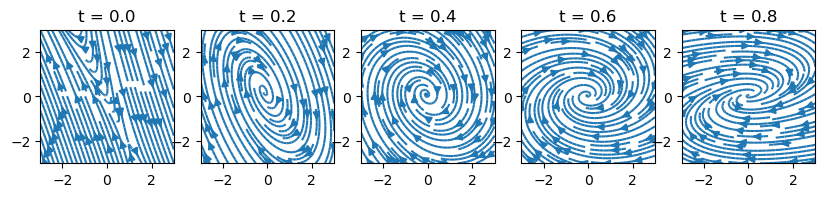

In [9]:
flow_wrapper.graph_flow_marginals()

In [10]:
print(f'Reverse KL loss: {flow_wrapper.reverse_kl_loss(100000, 10)}')
samples, _ = flow_wrapper.sample(10,10)
print(f'Target density of samples: {flow_wrapper._target.q_density.get_density(samples.q)}')

Reverse KL loss: 0.06658350676298141
Target density of samples: tensor([-1.8140, -5.6905, -2.3310, -2.6768, -2.0721, -1.9871, -1.8765, -3.0702,
        -1.7546, -1.6914], device='cuda:0', grad_fn=<LogsumexpBackward0>)


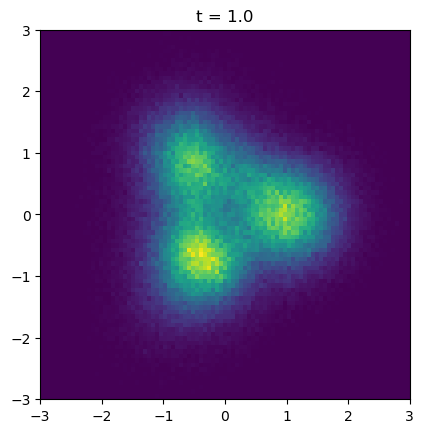

In [12]:
flow_wrapper.graph_end_marginals(300000, 15, xlim=3.0, ylim=3.0)

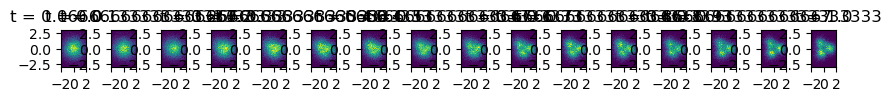

In [11]:
flow_wrapper.graph_time_marginals(100000, 15, ylim=3.0, xlim = 2.0)
